# Practical Application III: Comparing Classifiers

### 1) Overview:

In this practical application, our goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  


### 2) Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We make use of the article accompanying the dataset for more information on the data and features.



In this practical application alos, we refer back to a standard process in industry for data projects called CRISP-DM to frame the task, throughout for understanding the business problem, understanding data, analysis and preparation, modeling, evaluation and deployment as described in the below figure.

<img src = images/crisp.png width = 60%/>

### 3) Problem 1: Understanding the Data

To gain a better understanding of the data, information provided in the UCI link above are very useful and insightful, for example the **Materials and Methods** section of the paper.  

**3.1 Marketing Data Collection:**

This dataset is from from a Portuguese bank that used its own contact-center to do directed marketing campaigns. The telephone, with a human agent as the interlocutor, was the dominant marketing channel, although sometimes with an auxiliary use of the Internet online banking channel (e.g. by showing information to specific targeted client). Furthermore, each campaign was managed in an integrated fashion and the results for all channels were outputted together.

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored as shown in the below table.

<img src = images/Table2.png width = 60%/>




**3.2 Computational Environment**

All experiments reported in this work were conducted using the rminer library, which is an open source package for the R tool that facilitates the use of DM techniques (and in particular, classification tasks), and rattle, a graphical user interface for DM in R. The rminer main advantage is that only a few set of coherent functions are required for a complex DM analysis. 

### 4) Problem 2: Read in the Data

There are four datasets:

a) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).

b) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

c) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

d) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms.


I am using pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# importing Pandas & sklearn Lib

import pandas as pd
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, RocCurveDisplay,recall_score, precision_score, precision_recall_curve,f1_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
#from imblearn.over_sampling import SVMSMOTE

In [2]:
# Reading "bank-additional-full.csv"
df = pd.read_csv('data/bank/bank-additional-full.csv', sep = ';')

In [3]:
# Dispaly basic info - column name and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Observation:** Dataset has 21 columns.

In [4]:
# Dispaly some more paramaters thru describe()
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Dispaly head records
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Dispaly tail records
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
# Dispaly 10 random samle records
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37626,18,student,single,basic.6y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,no
37515,25,admin.,single,university.degree,no,no,yes,cellular,aug,thu,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no
312,36,admin.,married,high.school,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23877,32,admin.,single,university.degree,no,yes,no,telephone,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
17185,56,technician,married,unknown,unknown,yes,no,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
40103,24,admin.,single,high.school,no,no,no,cellular,jul,mon,...,1,14,1,success,-1.7,94.215,-40.3,0.827,4991.6,yes
28949,32,blue-collar,married,basic.9y,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
35500,46,blue-collar,married,basic.9y,no,yes,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
37142,59,admin.,married,high.school,no,yes,no,cellular,aug,wed,...,2,2,1,success,-2.9,92.201,-31.4,0.884,5076.2,yes
37387,66,retired,unknown,basic.9y,no,yes,no,cellular,aug,wed,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,no


### 5) Problem 3: Understanding the Features


As in above section, we found that dataset has 21 columns. Here we examine the data in these 21 columns to determine if any of the features are missing values or need to be coerced to a different data type.

**5.1) Bank Marketing Data - Attribute Information**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**5.2) Related with the last contact of the current campaign:**
    
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). 

**Note:** this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**5.3) Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**5.4) Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**5.5) Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### 6) Problem 4: Understanding the Task

After examining the description and data, our goal now is to clearly state the Business Objective of the task. 

**6.1) Getting overall count**

Count from the given banking dataset

In [8]:
# Data count
df.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

**6.2) Cleaning data**

Removing Nan and duplicate values

In [9]:
#Removal of rows & columns with NaN/Null values and duplicates
df.dropna()
df.drop_duplicates()
df.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

**Observation:** There is no null or duplicate values

**6.3) Performing some more tasks**

In [10]:
df['y'].unique()
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/6k/mqy1hnns5gj0c9s_fj2kkctr0000gn/T/ipykernel_1664/3411544579.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


### 7) Problem 5: Engineering Features

Now as understand business objective, we build a basic model to get started.  Before we can do this, we must encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

As we clarified in the live session - I am going to use Using just the bank information features (columns 1 - 7), to prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
# Selecting features (columns 1 - 7)
df_used = df.iloc[:,0:7]
df_used['y'] = df['y']
df_used

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [12]:
# Getting basic details of this 7 features dataset

df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [13]:
# Checking basic parameters of this 7 features dataset

df_used.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [14]:
# Showing head of this 7 features dataset

df_used.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [15]:
# Showing tail of this 7 features dataset

df_used.tail()

,age,job,marital,education,default,housing,loan,y
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes
41187,74,retired,married,professional.course,no,yes,no,no


In [16]:
# encoding

# todo LabelEncoder job, marital, education, default,housing,loan
df_used = df_used.dropna()

def encode_columns(dataFrame, columns, encoder):
    for column in columns:
        dataFrame[column] = le.fit_transform(dataFrame[column])
    
le = LabelEncoder()
columns = ['job','marital','education','default','housing','loan']

encode_columns(df_used, columns, le)

df_corr = df_used.iloc[:]
df_corr['y']= le.fit_transform(df_corr['y'])
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,job,marital,education,default,housing,loan,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.004909
y,0.030399,0.025122,0.046203,0.057799,-0.099352,0.011552,-0.004909,1.000000


### 8) Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

I am spliting the used dataset as 65% for training and 355 for test

In [17]:
# Train and Test set data split

X = df_used.drop('y', axis=1)
y = df_used['y']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.35, random_state=42)


In [18]:
# Count train set

y_train.value_counts()

no     23766
yes     3006
Name: y, dtype: int64

<Axes: >

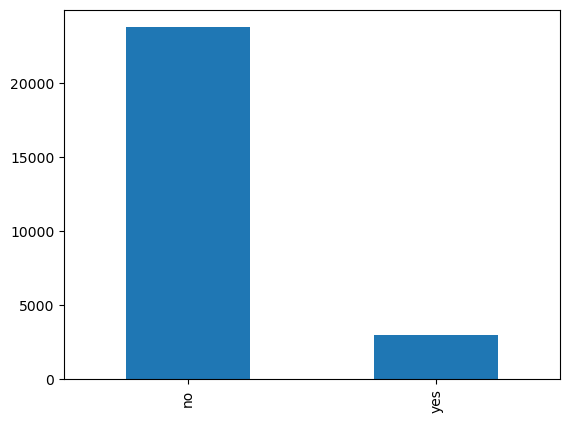

In [19]:
# Train set - bar plot "yes" vs "no"

y_train.value_counts().plot(kind='bar')

In [20]:
# Count test set

y_test.value_counts()

no     12782
yes     1634
Name: y, dtype: int64

<Axes: >

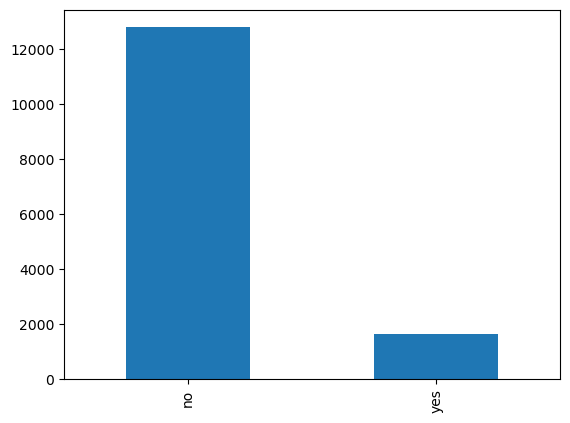

In [21]:
# Test set - bar plot "yes" vs "no"

y_test.value_counts().plot(kind='bar')

In [22]:
# Selecting features

from sklearn.feature_selection import SequentialFeatureSelector
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto')
sfs.fit_transform(X, y)

array([[3, 0, 0],
       [7, 1, 0],
       [7, 0, 0],
       ...,
       [5, 0, 0],
       [9, 0, 0],
       [5, 0, 0]])

In [23]:
print(sfs.get_feature_names_out())

['job' 'default' 'loan']


### 9) Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

- By performing different ML models, we aimed to get a better result or less error with max accuracy. 

- From the table below, Decision Tree, KNeighbor, Logistrics Regression, and Support Vector Machine algothims were evaluated. 
- Two tables indicate - Decision Tree method is the most optimum in terms of predicting the acceptance of subsciption of term deposite 
  based on the direct marketing campaign efforts.

Using Zero Rate Classifier to build a baseline classifier

In [24]:
y_test.value_counts(normalize=True)

no     0.886654
yes    0.113346
Name: y, dtype: float64

In [25]:
print( 'Baseline using ZeroR Classifier: ' , y_test.value_counts(normalize=True)['no'])

odds_of_no_pred  =  y_test.value_counts(normalize=True)['no'] ** 2
odds_of_yes_pred =  y_test.value_counts(normalize=True)['yes'] ** 2

print( 'Baseline using Random Rate Classifier : ',
      odds_of_no_pred + odds_of_yes_pred)

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_clf.predict(X_test)
print('Baseline using sklearn Dummy Classifier: ' , dummy_clf.score(X_test, y_test))

Baseline using ZeroR Classifier:  0.88665371809101
Baseline using Random Rate Classifier :  0.7990021954272044
Baseline using sklearn Dummy Classifier:  0.88665371809101


### 10) Problem 8: A Simple Model

Now we have to use Logistic Regression to build a basic model on your data.  

In [26]:
lgr = LogisticRegression(max_iter = 1000).fit(X_train,y_train)
lgr_preds = lgr.predict(X_test)
log_reg_mat  = confusion_matrix(y_test, lgr_preds, labels=lgr.classes_)
print(log_reg_mat)

[[12782     0]
 [ 1634     0]]


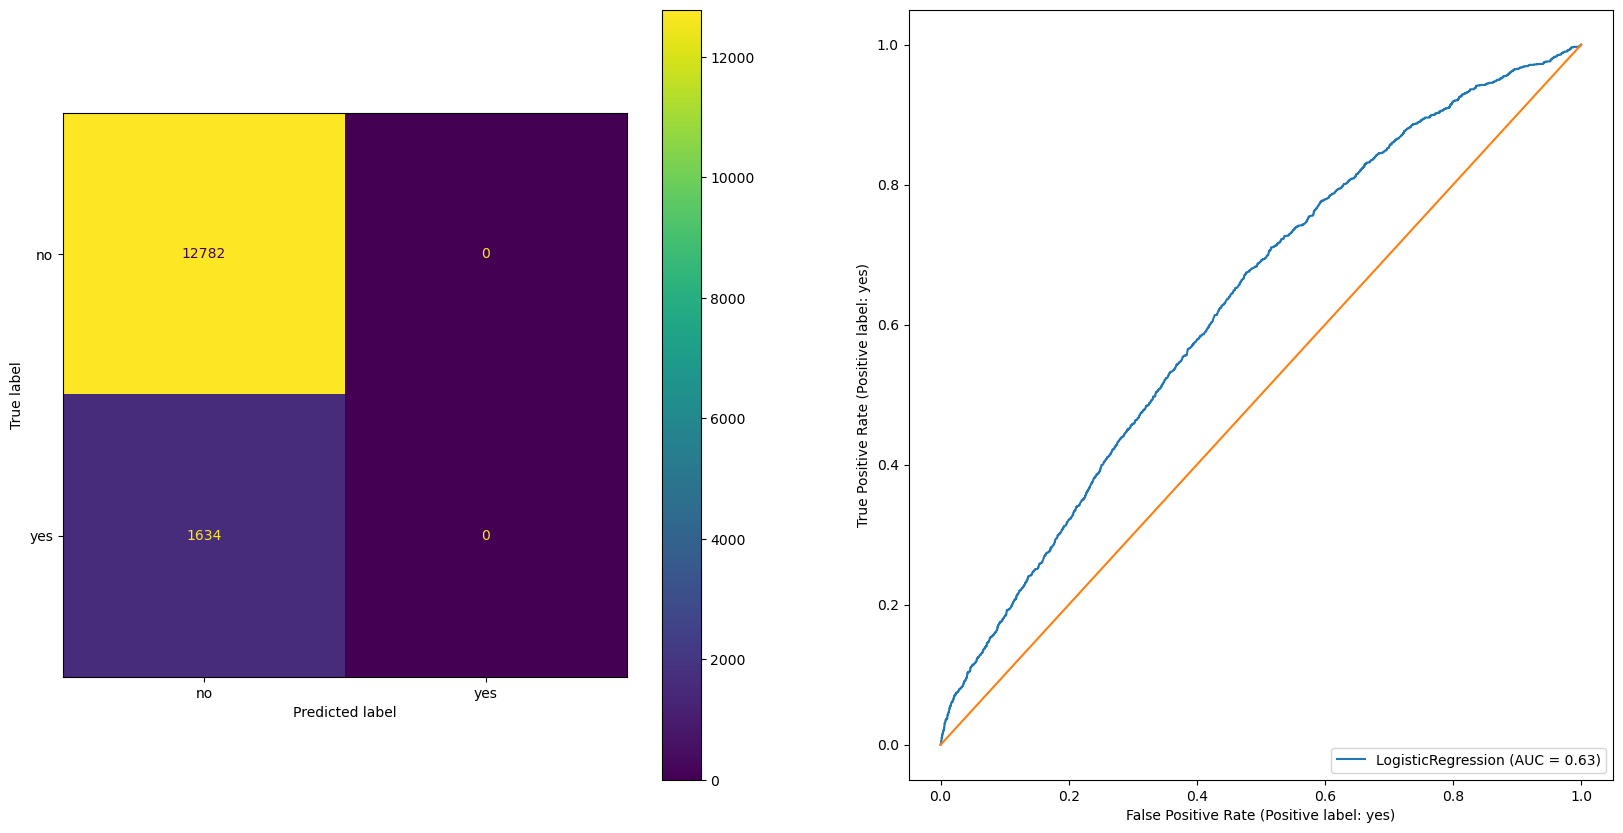

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]));

### 11) Problem 9: Score the Model

What is the accuracy of your model?, time to find out the accuracy

In [28]:
print('Simple model Logistic Regression score: ', lgr.score(X_test, y_test))

Simple model Logistic Regression score:  0.88665371809101


### 12) Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
def train_test_models(X_train,X_test, y_train, y_test):
    # Define models to train
    names = ["Logistic Regression", "KNeighbors Classifier",
             "Decision Tree",
             "SVM"
            ]

    #Define classifiers
    classifiers = [
        LogisticRegression(max_iter = 1000),
        KNeighborsClassifier(n_neighbors = 3),
        DecisionTreeClassifier(),
        SVC(kernel = 'linear')
    ]

    models = zip(names, classifiers)
    results = []

    for name, model in models:
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        training_time = end-start
        predictions = model.predict(X_test)
        train_score = model.score(X_train,y_train)
        test_score  = model.score(X_test,y_test)
        print(name,training_time,train_score,test_score)
        results.append([name,training_time,train_score,test_score])
    return results


results = train_test_models(X_train,X_test, y_train, y_test)
results_df = pd.DataFrame(results, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])
results_df.set_index('Model', inplace=True,drop=True)
results_df

Logistic Regression 0.20240998268127441 0.8877185118780816 0.88665371809101
KNeighbors Classifier 0.04121088981628418 0.8908561183325863 0.8611265260821309
Decision Tree 0.059072017669677734 0.9196175108322128 0.8604328523862376
SVM 17.914393186569214 0.8877185118780816 0.88665371809101


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.202410,0.887719,0.886654
KNeighbors Classifier,0.041211,0.890856,0.861127
Decision Tree,0.059072,0.919618,0.860433
SVM,17.914393,0.887719,0.886654


### 13) Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [30]:
needed_features = ['age', 'job','marital','education','default','housing','loan','pdays','previous','poutcome','y']
columns_to_encode = ['job','marital','education','default','housing','loan','poutcome']
df_improve = df[needed_features]
# df_improve
le = LabelEncoder()

encode_columns(df_improve, columns_to_encode, le)

df_corr_improve = df_improve.iloc[:]
df_corr_improve['y']= le.fit_transform(df_improve['y'])
corr_improve = df_corr_improve.corr()
corr_improve.style.background_gradient(cmap='coolwarm')

/var/folders/6k/mqy1hnns5gj0c9s_fj2kkctr0000gn/T/ipykernel_1664/1290352270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[column] = le.fit_transform(dataFrame[column])
/var/folders/6k/mqy1hnns5gj0c9s_fj2kkctr0000gn/T/ipykernel_1664/1290352270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[column] = le.fit_transform(dataFrame[column])
/var/folders/6k/mqy1hnns5gj0c9s_fj2kkctr0000gn/T/ipykernel_1664/1290352270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,-0.034369,0.024365,0.019750,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.028468,0.020965,0.011504,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.037942,0.038689,0.001912,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.046626,0.038831,0.017009,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.080062,-0.102416,0.023417,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.010551,0.021314,-0.011783,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,0.000345,-0.001327,-0.001511,-0.004909
pdays,-0.034369,-0.028468,-0.037942,-0.046626,0.080062,-0.010551,0.000345,1.000000,-0.587514,-0.475619,-0.324914
previous,0.024365,0.020965,0.038689,0.038831,-0.102416,0.021314,-0.001327,-0.587514,1.000000,-0.313110,0.230181
poutcome,0.019750,0.011504,0.001912,0.017009,0.023417,-0.011783,-0.001511,-0.475619,-0.313110,1.000000,0.129789


In [31]:
X_improve = df_improve.drop('y', axis=1)
y_improve = df_improve['y']

X_train_improve, X_test_improve, y_train_improve, y_test_improve = train_test_split(X_improve , y_improve, test_size = 0.35, random_state=42)
results = train_test_models(X_train_improve, X_test_improve, y_train_improve, y_test_improve)
results_df_improve = pd.DataFrame(results, columns=['Model','Train Time','Train Accuracy','Test Accuracy'])
results_df_improve.set_index('Model', inplace=True,drop=True)
results_df_improve

Logistic Regression 0.2915058135986328 0.898438667264306 0.896711986681465
KNeighbors Classifier 0.05088186264038086 0.9059091588226506 0.8763873473917869
Decision Tree 0.06691908836364746 0.9415060510981622 0.8620976692563818
SVM 11949.83768606186 0.8982519049753473 0.8961570477247502


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.291506,0.898439,0.896712
KNeighbors Classifier,0.050882,0.905909,0.876387
Decision Tree,0.066919,0.941506,0.862098
SVM,11949.837686,0.898252,0.896157


### 14) Findings

Baseline using ZeroR Classifier: 0.88665371809101

Baseline using Random Rate Classifier : 0.7990021954272044

Baseline using sklearn Dummy Classifier: 0.88665371809101

**Observation**

Logistic Regression and SVM have train and test scores equal or more than baseline

Both Decision Tree Classifier and KNeighbor CLassifier have higher training score than baseline but test scores are below baseline

Logistic Regression, and Support Vector Machines performance is better than baseline.

Decision Trees and K Nearest Neighbor did not perform better than baseline.

Decision Trees and K Nearest Neighbor performace increased by using optimal hyper parameters suggested by RandomizedSearchCV.

Thank you!